# Posttest 4
## Data Preprocessing

#### Library Yang akan diinput

In [687]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler  
import matplotlib.pyplot as plt                    
import seaborn as sns   
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#### Membaca dataset

In [688]:
df = pd.read_csv("Dataset/CustomerSegmentation - Rusak.csv")

### Data Split

##### Membagi Columnya

In [689]:
data_X = df[["ID","Ever_Married","Age","Graduated","Profession","Work_Experience","Spending_Score","Family_Size","Var_1"]]
label_Y = df[["Segmentation"]]

##### Membagi Dataset nya menjadi 70 : 30

In [690]:
x_train, x_test, y_train, y_test = train_test_split(data_X,label_Y,test_size=.3)

##### Melihat Bahwa Dataset sudah terbagi

In [691]:
print(f'Jumlah data train adalah {len(x_train)} row',
      f'Jumlah label train adalah {len(y_train)} row',
      f'Jumlah data tes adalah {len(x_test)} row',
      f'Jumlah label tes adalah {len(y_test)} row',
      f'Jumlah dataset adalah {len(df)} row',
      sep='\n')

Jumlah data train adalah 5649 row
Jumlah label train adalah 5649 row
Jumlah data tes adalah 2422 row
Jumlah label tes adalah 2422 row
Jumlah dataset adalah 8071 row


### Normalisasi Data

##### Mengcopy dataset

In [692]:
df_normalisasi = df.copy()

##### Normalisasi Data menggunakan Min Max Scaler

In [693]:
scaler = MinMaxScaler()

In [694]:
normalisasi_df = scaler.fit_transform(df_normalisasi[["Age","Work_Experience","Family_Size"]])
normalisasi_df = pd.DataFrame(normalisasi_df)
normalisasi_df.rename(columns={0:"Age",1:"Work_Experience",2:"Family_Size"},inplace =True)

##### Melihat dataset setelah di normalisasi

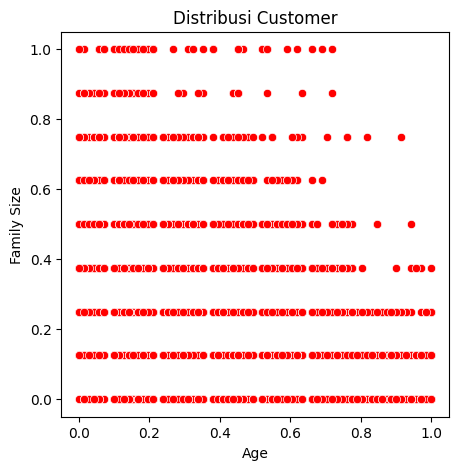

In [695]:
plt.figure(1,figsize=(5,5))
sns.scatterplot(normalisasi_df, x='Age', y='Family_Size', color='red')
plt.title('Distribusi Customer')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.show()

### Standarisasi Data

##### Mengcopy Dataset

In [696]:
standarisasi_df = df.copy()

##### Standarisasi Dataset

In [697]:
standarisasi_df.drop(["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1","Segmentation"],axis=1,inplace=True)

##### Mengisi data yang kosong --> Standarisasi Tidak dapat dilakukan jika dataset masih ada yang kosong atau NaN

In [698]:
standarisasi_df["Work_Experience"].fillna(standarisasi_df["Work_Experience"].mean(),inplace=True)
standarisasi_df["Family_Size"].fillna(standarisasi_df["Family_Size"].mean(),inplace=True)

In [699]:
tool_standar = StandardScaler()
df_standar = tool_standar.fit_transform(standarisasi_df)

##### Melihat dataset setelah di standarisasi

In [700]:
print("Standar Deviasi : ", np.std(df_standar))

Standar Deviasi :  1.0


### Data Cleaning ---> Null Value

##### Mengcopy dataset ke dataframe baru

In [701]:
df_clean = df.copy()

##### Melihat apakah ada data yang null

In [702]:
df_clean.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         125
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

##### Melihat tipe objek

In [703]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8071 non-null   int64  
 1   Gender           8071 non-null   object 
 2   Ever_Married     7931 non-null   object 
 3   Age              8071 non-null   int64  
 4   Graduated        7993 non-null   object 
 5   Profession       7946 non-null   object 
 6   Work_Experience  7242 non-null   float64
 7   Spending_Score   8071 non-null   object 
 8   Family_Size      7736 non-null   float64
 9   Var_1            7995 non-null   object 
 10  Segmentation     8071 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.7+ KB


##### Membuat alat yang akan digunakan untuk mengganti nilai null

In [704]:
imputer_mean = SimpleImputer(strategy="mean")
imputer_median = SimpleImputer(strategy="median")
imputer_modus = SimpleImputer(strategy="most_frequent")

##### Mengganti nilai null ---> Untuk Nilai Yang Berupa object

In [705]:
df_clean["Ever_Married"] = imputer_modus.fit_transform(df_clean[["Ever_Married"]])
df_clean["Graduated"] = imputer_modus.fit_transform(df_clean[["Graduated"]])
df_clean["Profession"] = imputer_modus.fit_transform(df_clean[["Profession"]])
df_clean["Var_1"] = imputer_modus.fit_transform(df_clean[["Var_1"]])

##### Mengganti nilai null ---> Agar nilai menjadi Bilangan bulat

In [706]:
df_clean["Family_Size"] = imputer_median.fit_transform(df_clean[["Family_Size"]])

##### Mengganti nilai null ---> Agar nilai menjadi bilangan desimal

In [707]:
df_clean["Work_Experience"] = imputer_mean.fit_transform(df_clean[["Work_Experience"]])

###### Melihat apakah data sudah terisi semua

In [708]:
df_clean.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### Data Cleaning ---> Duplicate Value

##### Melihat apakah ada data yang duplikat

In [709]:
df_clean.duplicated().sum()

3

##### Menghapus data yang duplikat

In [710]:
df_clean.drop_duplicates(inplace=True)

##### Melihat lagi apakah data duplikat sudah terhapus

In [711]:
df_clean.duplicated().sum()

0

### Mengganti Tipe data salah satu attribute angka

##### Melihat tipe data attribute

In [712]:
df_clean.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

##### Mengganti Tipe data attribute angka

In [713]:
df_clean["Age"] = df_clean["Age"].astype("object")

##### Melihat apakah tipe atribut sudah terubah

In [714]:
df_clean.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                 object
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

### One Hot Encoding

##### Buat dataframe baru

In [715]:
data_encoder = df_clean.copy()

##### Buat Tool Encoder

In [716]:
encoder = OneHotEncoder(sparse=False)

##### Ubah label dari kategorical menjadi binary

In [717]:
temp_df = encoder.fit_transform(data_encoder[['Segmentation']]).astype('int32')

##### Ubah dataset menjadi dataframe

In [718]:
temp_df = pd.DataFrame(temp_df)

##### Hapus label yang sebelumnya kategorical

In [719]:
data_encoder.drop('Segmentation', axis=1, inplace=True)

##### Tambah atribut baru

In [720]:
data_encoder = data_encoder.join(temp_df)

##### Ubah nama atribut label

In [721]:
data_encoder.rename(columns={0:'A', 1:'B', 2:'C',3:'D'}, inplace=True)

##### Menunjukkan Hasil Record

In [722]:
data_encoder[1:100]

ID  Gender Ever_Married Age Graduated     Profession  Work_Experience  \
1   462643  Female          Yes  38       Yes       Engineer         2.640845   
2   466315  Female          Yes  67       Yes       Engineer         1.000000   
3   461735    Male          Yes  67       Yes         Lawyer         0.000000   
4   462669  Female          Yes  40       Yes  Entertainment         2.640845   
5   461319    Male          Yes  56        No         Artist         0.000000   
..     ...     ...          ...  ..       ...            ...              ...   
95  463845    Male          Yes  58       Yes         Artist         2.640845   
96  459976  Female           No  38       Yes         Artist         0.000000   
97  461334    Male          Yes  63       Yes         Artist         0.000000   
98  465108    Male          Yes  58       Yes         Doctor         1.000000   
99  462600    Male          Yes  30        No       Engineer         3.000000   

   Spending_Score  Family_Size  Var_1  A  B  C  D  
1         Average          3.0  Cat_4  1  0  0  0  
2             Low          1.0  Cat_6  0  1  0  0  
3            High          2.0  Cat_6  0  1  0  0  
4            High          6.0  Cat_6  1  0  0  0  
5         Average          2.0  Cat_6  0  0  1  0  
..            ...          ...    ... .. .. .. ..  
95        Average          1.0  Cat_6  0  0  0  1  
96            Low          1.0  Cat_6  0  0  0  1  
97           High          2.0  Cat_6  0  0  1  0  
98        Average          2.0  Cat_6  0  0  1  0  
99        Average          3.0  Cat_4  0  0  0  1  

[99 rows x 14 columns]